In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer
from nltk.util import ngrams
from nltk.tokenize import word_tokenize
from nltk.tokenize import TweetTokenizer
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer as ps
import igraph as ig
import tqdm
import string
import operator

C:\Users\halan\AppData\Local\Temp\ipykernel_15060\4050790959.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [20]:
nltk.download('all')

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to
[nltk_data]    |     C:\Users\halan\AppData\Roaming\nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to
[nltk_data]    |     C:\Users\halan\AppData\Roaming\nltk_data...
[nltk_data]    |   Package alpino is already up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     C:\Users\halan\AppData\Roaming\nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger is already up-
[nltk_data]    |       to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_eng to
[nltk_data]    |     C:\Users\halan\AppData\Roaming\nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger_eng is already
[nltk_data]    |       up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     C:\Users\halan\AppData\Roaming\nltk_data...
[

True

In [21]:
# Test code to see how these functions work

text = "This is an example of a bigram in Python"
tokens = word_tokenize(text)  # Tokenizing the text
bigrams = list(ngrams(tokens, 2))  # Creating bigrams

In [22]:
# Defining Operators
ops = {'>': operator.gt,
       '<': operator.lt,
       '>=': operator.ge,
       '<=': operator.le,
       '==': operator.eq}

In [23]:
# More test code

print(text)

print(bigrams)

This is an example of a bigram in Python
[('This', 'is'), ('is', 'an'), ('an', 'example'), ('example', 'of'), ('of', 'a'), ('a', 'bigram'), ('bigram', 'in'), ('in', 'Python')]


In [24]:
# Importing dataset
data = pd.read_csv('Sedona_Reviews_With_Sentiment.csv')

In [25]:
# Viewing dataset
data['Review Text']

0      Clean secure apartments in a great location wi...
1      Just excellent people at the Main Office. Clau...
2      I have never written a review before, but I ju...
3      So far the experience has been great and the r...
4      Extremely nice people at The Sedona. My apartm...
                             ...                        
178    Was top but is steadily declining. Halls are d...
179    The apartments are well-appointed, the staff i...
180    Up to now, I have been happy at The Sedona. A ...
181    I absolutely love living at The Sedona! Everyt...
182    Very professional staff and they keep the livi...
Name: Review Text, Length: 183, dtype: object

In [26]:
# The way the TweetTokenizer works it needs an instance for it to work
# To add on, regular Tokenizer does not take into account certain punctuation
# For example, "it's", normal word_tokenizer will split it up into "it" and "'s"
# Whereas TweetTokenizer will turn it into "it's"
ttk = TweetTokenizer()

# Defining the stop words (Language)
stopWords = set(stopwords.words('english'))

In [27]:
def tokenFunction(dataList):

    # Creating temporary list
    tempText = []
    
    # Tokenizing the sentence from the file
    for i in dataList:
        #print(i)
        tempText.append(list(ttk.tokenize(i)))

    return tempText

In [29]:
def lemmFunction(dataList):
    
    # Creating temporary list
    tempText = []
    
    # Lemmatizing the tokenized text, this will simplify the words to their
    #   base form.
    for i in dataList:
        tempText.append([w for w in i if not w.lower() in stopWords])

    return tempText

In [30]:
def puncFilter(dataList):
    
    # Creating temporary list
    tempText = []

    # Filtering Punctuation, this will get rid of any punctuation in the data
    for i in dataList:
        tempText.append(' '.join([char for char in i if char not in string.punctuation]))

    return tempText

In [31]:
# Function to Clean List of Data

def textCleaner(dataList):

    # Creating temporary list
    tempText = []

    # Tokenizing the sentence from the file
    tempText = tokenFunction(dataList)

    # Lemmatizing the tokenized text, this will simplify the words to their
    #   base form.
    tempText = lemmFunction(tempText)

    # Filtering Punctuation, this will get rid of any punctuation in the data
    tempText = puncFilter(tempText)

    # Retokenizing, we need to retokenize as the only way I could get the punctuation filter
    #   to work required the tokenized text to turn back into a sentence. The punctuation 
    #   removal needed to be done prior to the lemmatization.
    tempText = tokenFunction(tempText)

    # Returning the new List
    return tempText

In [32]:
# Function for creating Bigram Lists

def bigramCreator(dataList2):
    
    # Defining a bigramList
    bigramList = []

    # Looping for every line in the list
    for i in dataList2:
        
        # Turning the sentences into bigrams and appending it to bigramList
        bigramList.append(list(ngrams(i, 2)))

    # Returning the new list
    return bigramList

In [33]:
# Function for getting a word count of all the words

def wordCounter(dataList3):

    # Creating temporary dictionary
    tempWordDict = {}
    
    # Cycle through lines in the list parsed through
    for words in dataList3:

        # Cycle through all the words in the lines
        for word in words:

            # Check each word to see if it already exists in tempWordList
            if word not in tempWordDict:

                # If the word does not exist, make it = 1 and it now exists
                tempWordDict[word] = 1
            else:

                # If the word exists then up the counter
                tempWordDict[word] += 1

    # Return the list
    return tempWordDict
    
    

In [34]:
# Function for sorting reviews by sentiment

def reviewSorter(data, type):

    # Creating list and counter
    Reviews = []
    tempCounter = 0

    # Switch that will check what the user wants
    match type:
        case "Negative":

            # Run through all of the sentences
            for i in data['Sentiment']:

                # Check whether it's the kind they want
                if (i == "Negative"):

                    # Append the sentence to the new list
                    Reviews.append(data.loc[tempCounter, 'Review Text'])

                # Increase the counter
                # This cannot be nested as it must go up alongside the i
                tempCounter += 1    
        case "Positive":
            for i in data['Sentiment']:
                if (i == "Positive"):
                    Reviews.append(data.loc[tempCounter, 'Review Text'])
                tempCounter += 1    
        case "Neutral":
            for i in data['Sentiment']:
                if (i == "Neutral"):
                    Reviews.append(data.loc[tempCounter, 'Review Text'])
                tempCounter += 1    
        case _:

            # To catch any errors
            print("Error in `Type`")

    return Reviews

In [35]:
# Function for sorting reviews by review score

def reviewSorterSCORE(data, type, score):

    # Creating list and counter
    reviews = []
    tempCounter = 0

    # If condition if what the user wants exists (The operation)
    if (type == '<' or
        type == '<=' or
        type == '>' or
        type == '>=' or
        type == '=='):

        # Run through all of the sentences
        for i in data['Score']:

        # Check whether it's the kind they want
            if (ops[type](i, score)):

                # Append the sentence to the new list
                reviews.append(data.loc[tempCounter, 'Review Text'])

            # Increase the counter
            # This cannot be nested as it must go up alongside the i
            tempCounter += 1    

    else:
        # To catch any errors
        print("Error in type of Operator. Use: <, <=, >, >=, ==")

    return reviews

In [36]:
def DFMaker(DF):
    return pd.DataFrame({'word': [k for k in DF.keys()], 'cnt': [v for v in DF.values()]})

In [37]:
# This is testing with all the reviews and only tokenization

tempTokenized = tokenFunction(data['Review Text'])
tempBigram = bigramCreator(tempTokenized)
tempWordCount = wordCounter(tempBigram)
wordCountDF = DFMaker(tempWordCount)

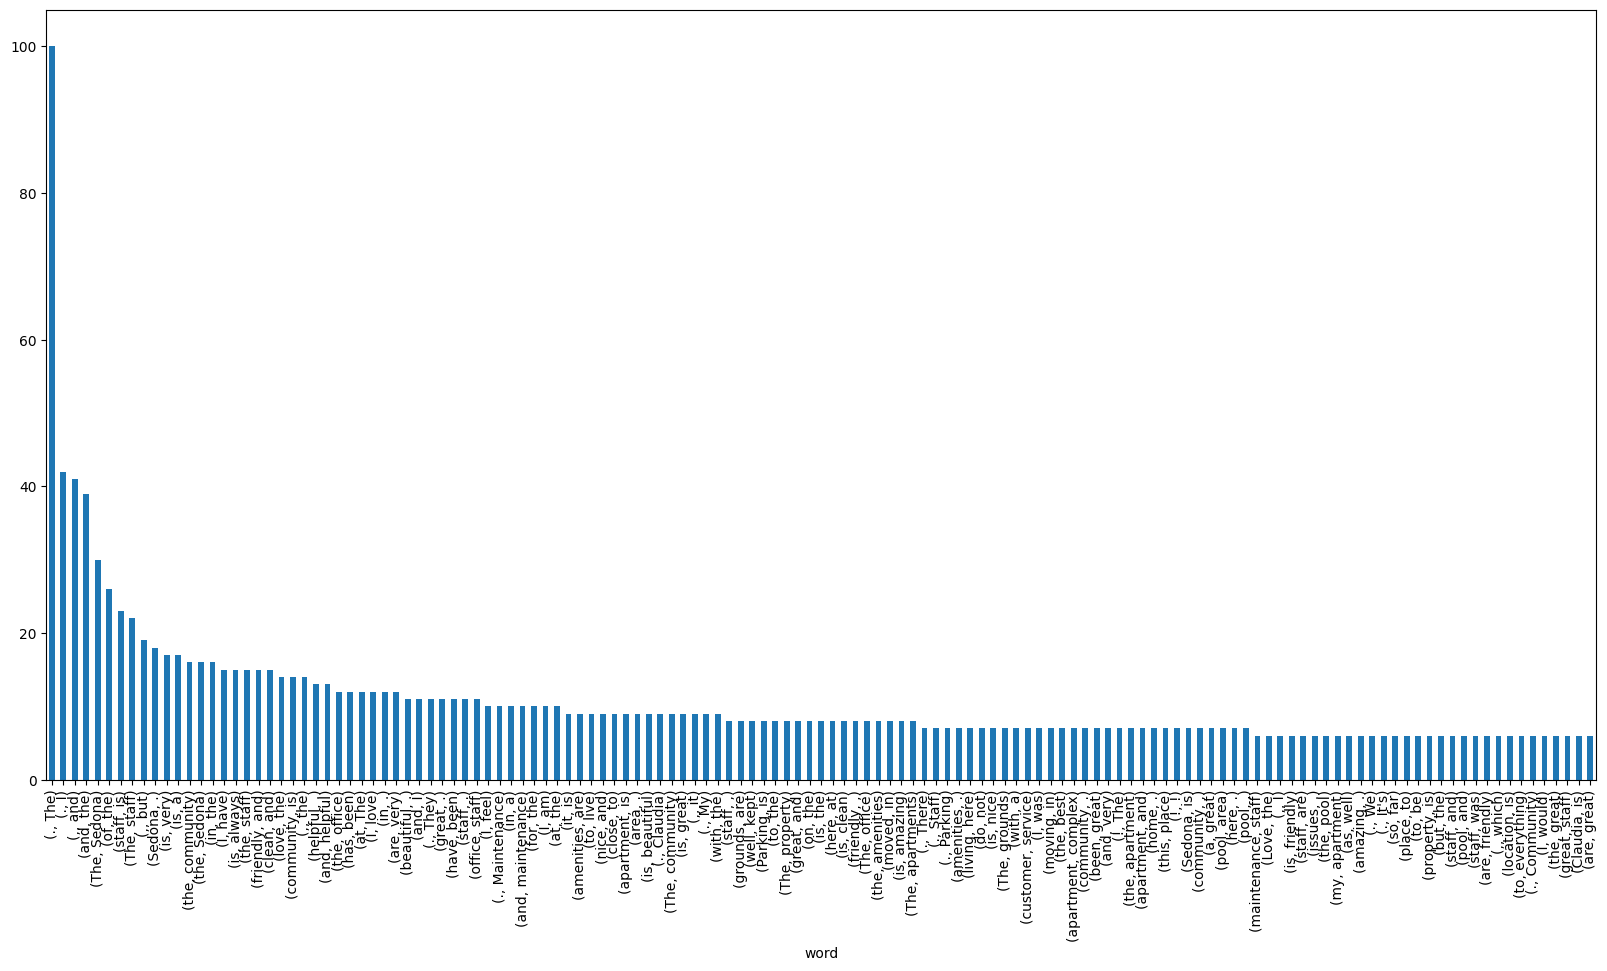

In [38]:


temp = wordCountDF[wordCountDF['cnt'] > 5]
temp.sort_values(by='cnt', ascending=False).plot(kind='bar', x='word', y='cnt', figsize=(20,10), legend=False)
plt.show()

In [39]:
# This is testing all reviews with tokenization and lemmatization

tempTokenized = tokenFunction(data['Review Text'])
tempLemm = lemmFunction(tempTokenized)
tempBigram = bigramCreator(tempLemm)
tempWordCount = wordCounter(tempBigram)
wordCountLemDF = DFMaker(tempWordCount)

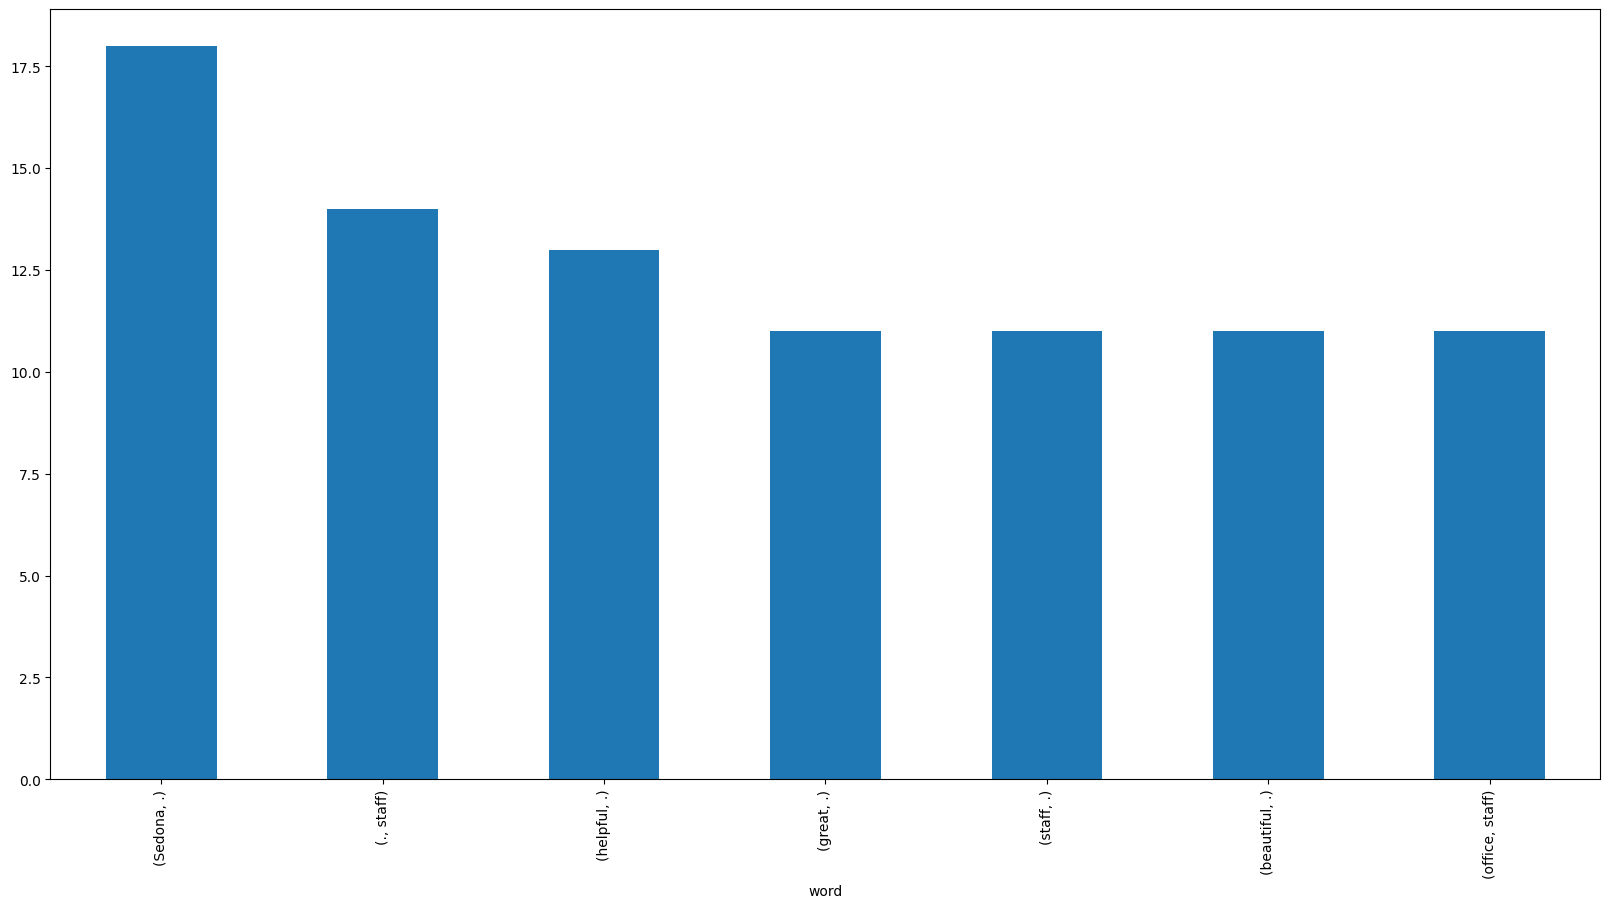

In [40]:
tempL = wordCountLemDF[wordCountLemDF['cnt'] > 10]
tempL.sort_values(by='cnt', ascending=False).plot(kind='bar', x='word', y='cnt', figsize=(20,10), legend=False)
plt.show()

In [41]:
tempClean = textCleaner(data['Review Text'])
tempBigram = bigramCreator(tempClean)
tempWordCount = wordCounter(tempBigram)
wordCountFDF = DFMaker(tempWordCount)

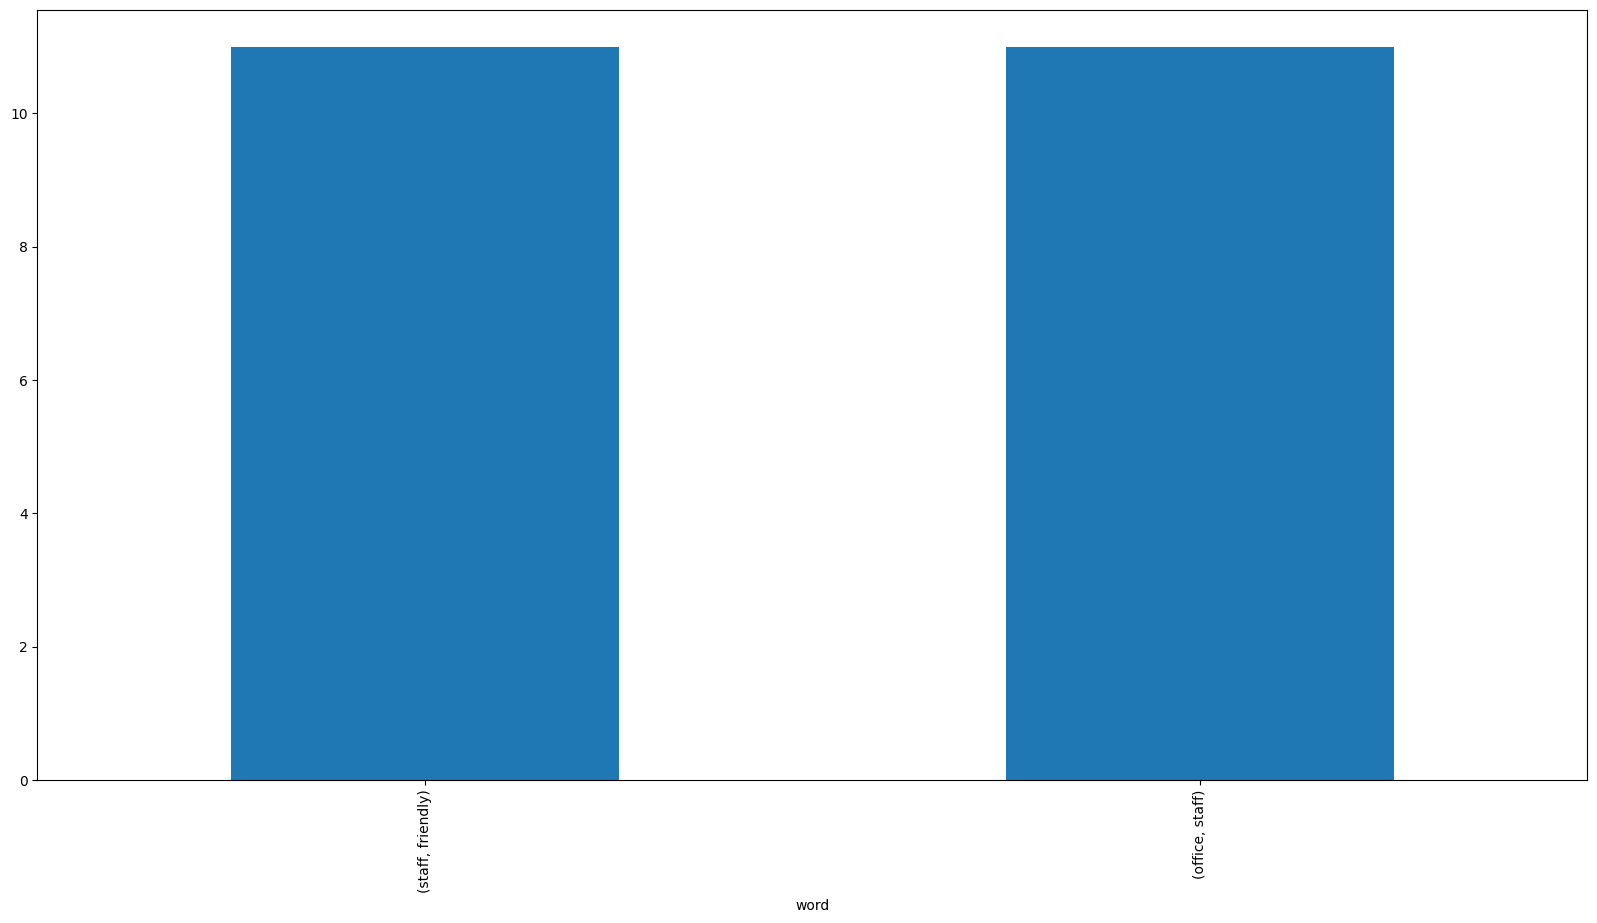

In [42]:
# This is testing with tokenization, lemmatization and punctuation removed.

tempF = wordCountFDF[wordCountFDF['cnt'] > 10]
tempF.sort_values(by='cnt', ascending=False).plot(kind='bar', x='word', y='cnt', figsize=(20,10), legend=False)
plt.show()

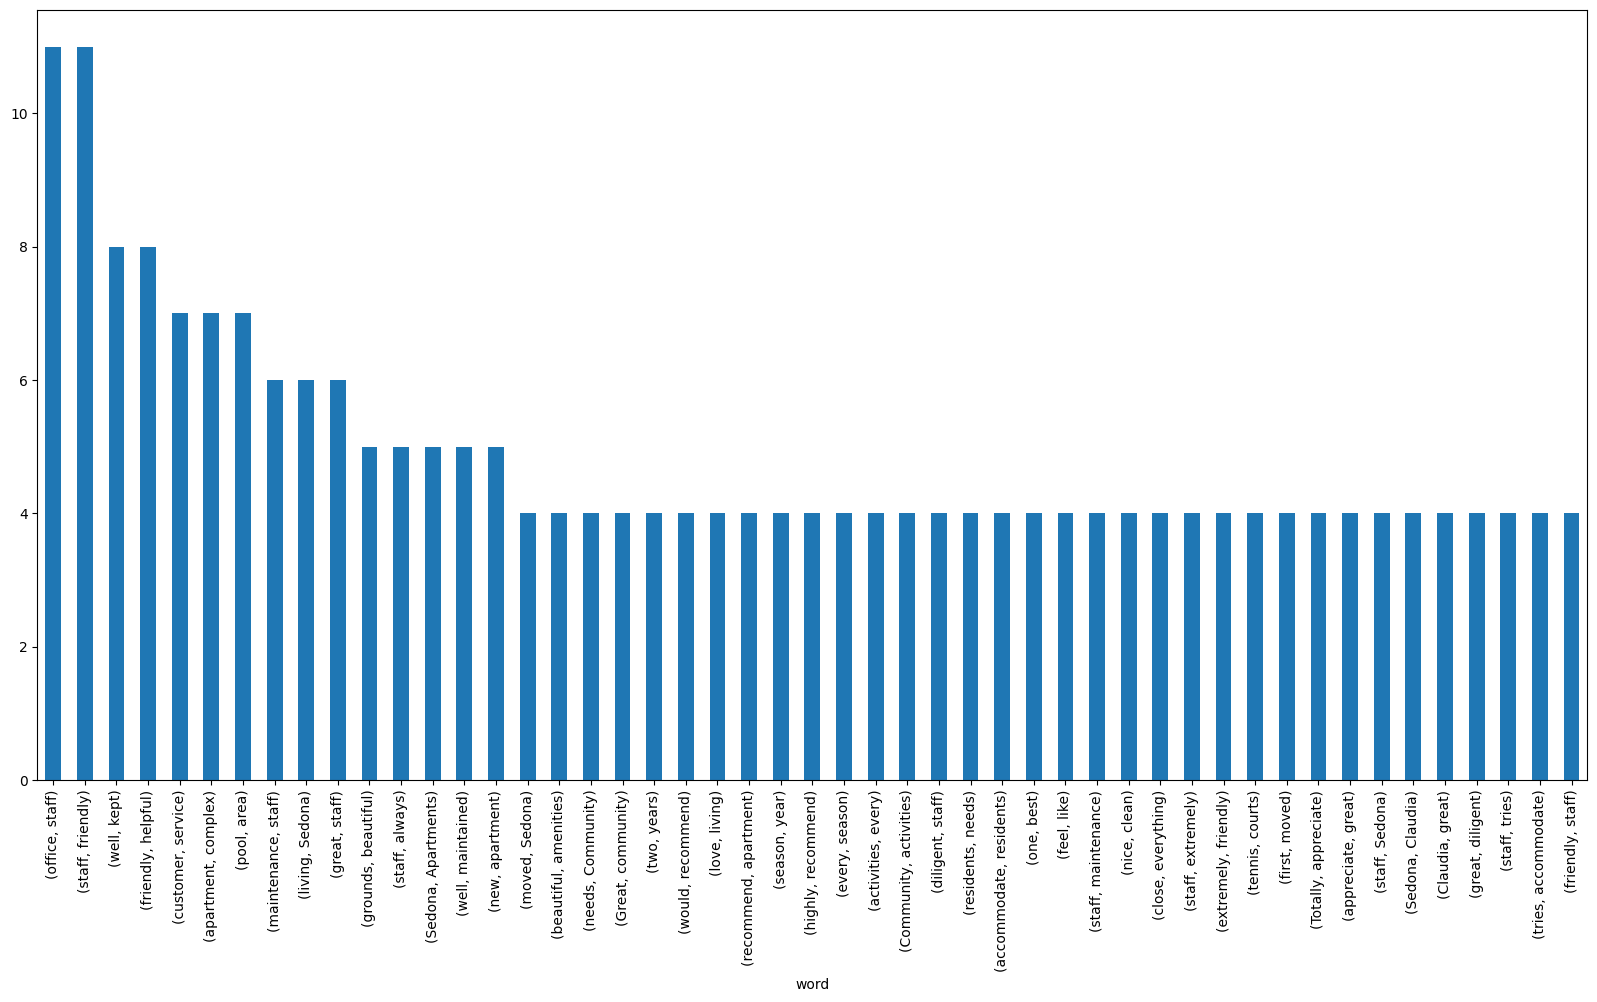

In [43]:
# Same as above except showing results for anything that has occured more than three times.

tempF = wordCountFDF[wordCountFDF['cnt'] > 3]
tempF.sort_values(by='cnt', ascending=False).plot(kind='bar', x='word', y='cnt', figsize=(20,10), legend=False)
plt.show()

In [24]:
#
#
# Here below I'll check with only Negative sentiment.
#
#

In [44]:

negativeReviews = reviewSorter(data, "Negative")

In [45]:
print(len(negativeReviews))

28


In [46]:
# Making a cleaned list and then running the reviews through the cleaner
cleanedNegativeReviews = []
cleanedNegativeReviews = textCleaner(negativeReviews)

In [47]:
# Creating the bigram, getting the amount of words and then making it into a data frame
testB = bigramCreator(cleanedNegativeReviews)
testDict = wordCounter(testB)
testDF = DFMaker(testDict)

In [48]:
print(testDict)

{('Terrible', 'service'): 1, ('service', 'Maintenance'): 1, ('Maintenance', 'asks'): 1, ('asks', 'tenants'): 1, ('tenants', 'complete'): 1, ('complete', 'repairs'): 1, ('repairs', 'even'): 1, ('even', 'show'): 1, ('show', 'submitted'): 1, ('submitted', 'service'): 1, ('service', 'requests'): 1, ('requests', 'sent'): 1, ('sent', 'email'): 1, ('email', 'response'): 1, ('response', 'repair'): 1, ('repair', 'requests'): 1, ('requests', 'go'): 1, ('go', 'unanswered'): 1, ('Sedona', 'beautiful'): 1, ('beautiful', 'property'): 1, ('property', 'floors'): 1, ('floors', 'walls'): 1, ('walls', 'thin'): 2, ('thin', 'living'): 1, ('living', 'hell'): 1, ('hell', 'upstairs'): 1, ('upstairs', 'neighbors'): 1, ('neighbors', 'renewing'): 1, ('renewing', 'lease'): 1, ('lease', 'Many'): 1, ('Many', 'people'): 1, ('people', 'live'): 1, ('live', 'also'): 1, ('also', 'pick'): 1, ('pick', 'dog'): 1, ('dog', 'poop'): 1, ('poop', 'Watch'): 1, ('Watch', 'land'): 1, ('land', 'mines'): 1, ('Community', 'quiet'): 1

In [49]:
print(testDF)

                        word  cnt
0        (Terrible, service)    1
1     (service, Maintenance)    1
2        (Maintenance, asks)    1
3            (asks, tenants)    1
4        (tenants, complete)    1
..                       ...  ...
431        (rules, enforced)    1
432  (enforced, Maintenance)    1
433      (Maintenance, blew)    1
434           (blew, debris)    1
435           (debris, away)    1

[436 rows x 2 columns]


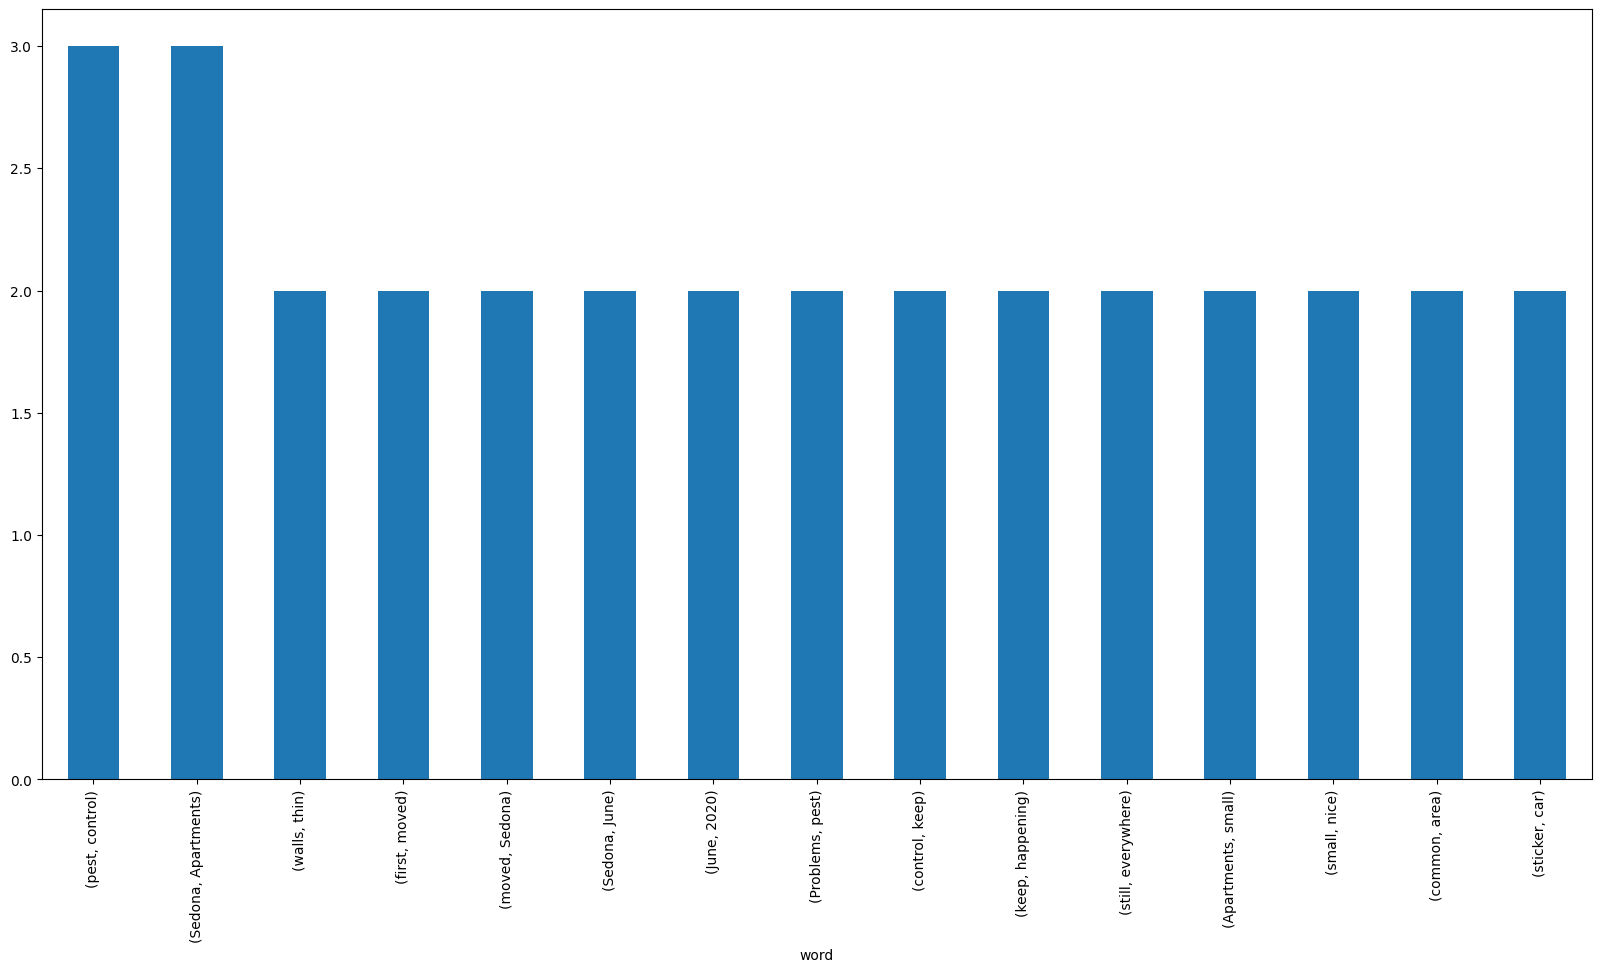

In [50]:
tempN = testDF[testDF['cnt'] > 1]
tempN.sort_values(by='cnt', ascending=False).plot(kind='bar', x='word', y='cnt', figsize=(20,10), legend=False)
plt.show()

In [51]:
testDict2 = wordCounter(cleanedNegativeReviews)
testDF2 = DFMaker(testDict2)

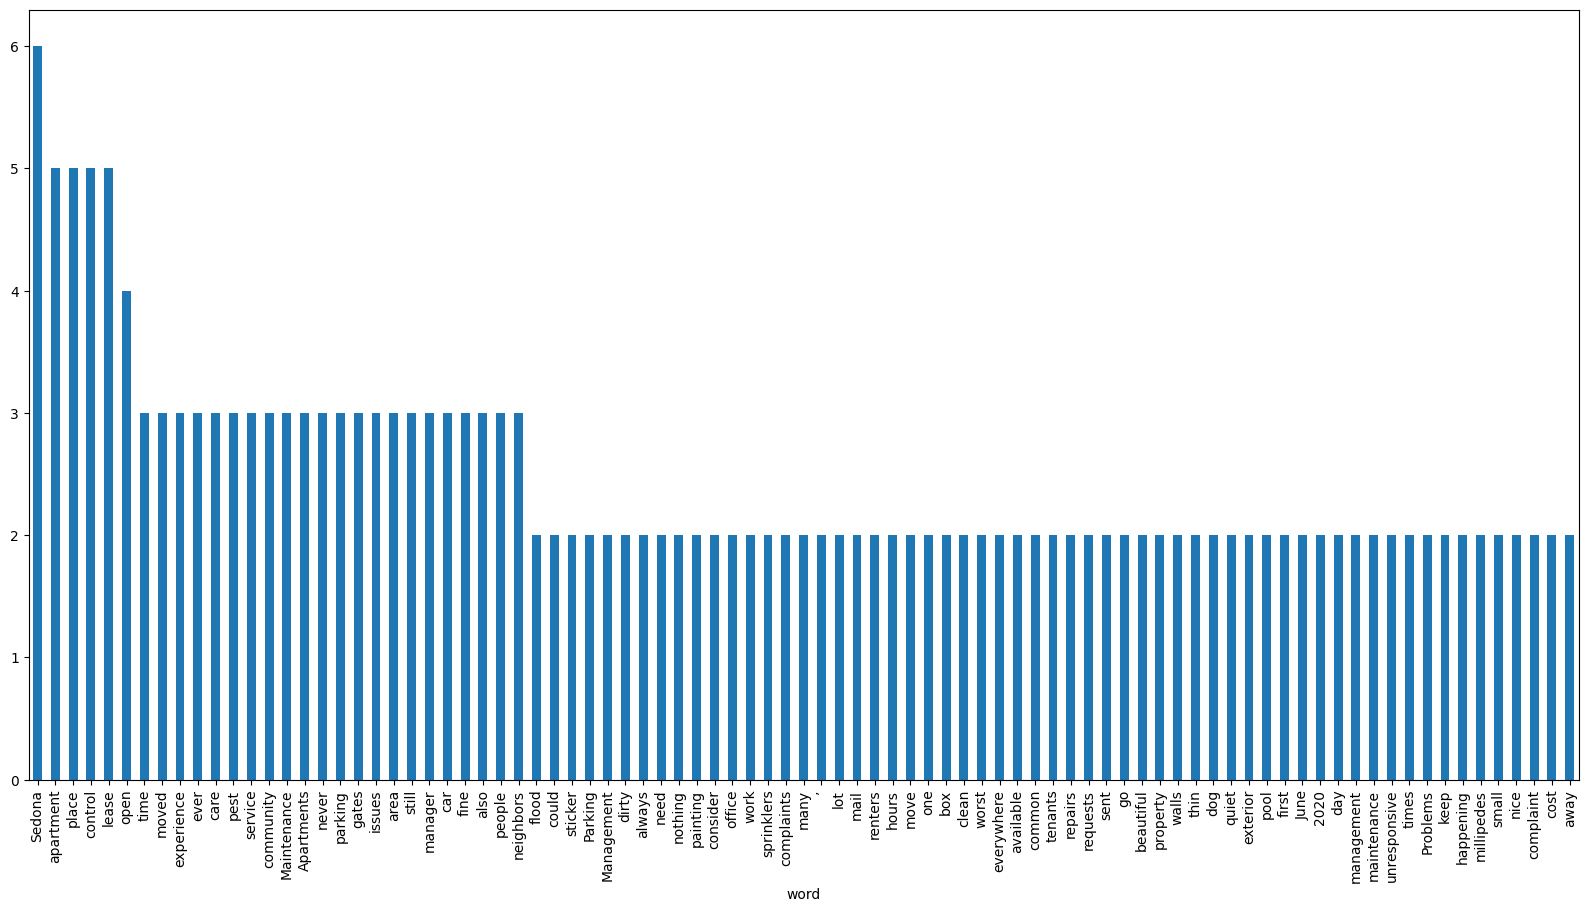

In [52]:
tempN2 = testDF2[testDF2['cnt'] > 1]
tempN2.sort_values(by='cnt', ascending=False).plot(kind='bar', x='word', y='cnt', figsize=(20,10), legend=False)
plt.show()

In [34]:
#
#
# TESTING WITH NEW DATA 2/17/25
#
#

In [53]:
newData = pd.read_csv("reviews_cleaned (1).csv")

In [54]:
print(newData['Review Text'])

0       Vey good leasing agent (Anne) and tour experie...
1       I love it here, best place to live. All the st...
2       It has been a pleasure living there. I absolut...
3       The staff is friendly and welcoming. Maintenan...
4       It's been great leaving here, nice and quiet, ...
                              ...                        
1572    The Gallery at Mills Park Apartments has great...
1573    Modera Creative Village is a pet-friendly comm...
1574    Veridian on Bumby Apartments has a convenient ...
1575    Windward Apartments is a quiet community with ...
1576    CitiTower has a great downtown location and mo...
Name: Review Text, Length: 1577, dtype: object


In [55]:
tempData = newData

In [56]:
tempData = tempData.drop(860)


In [57]:
tempData = tempData.dropna(how='any')

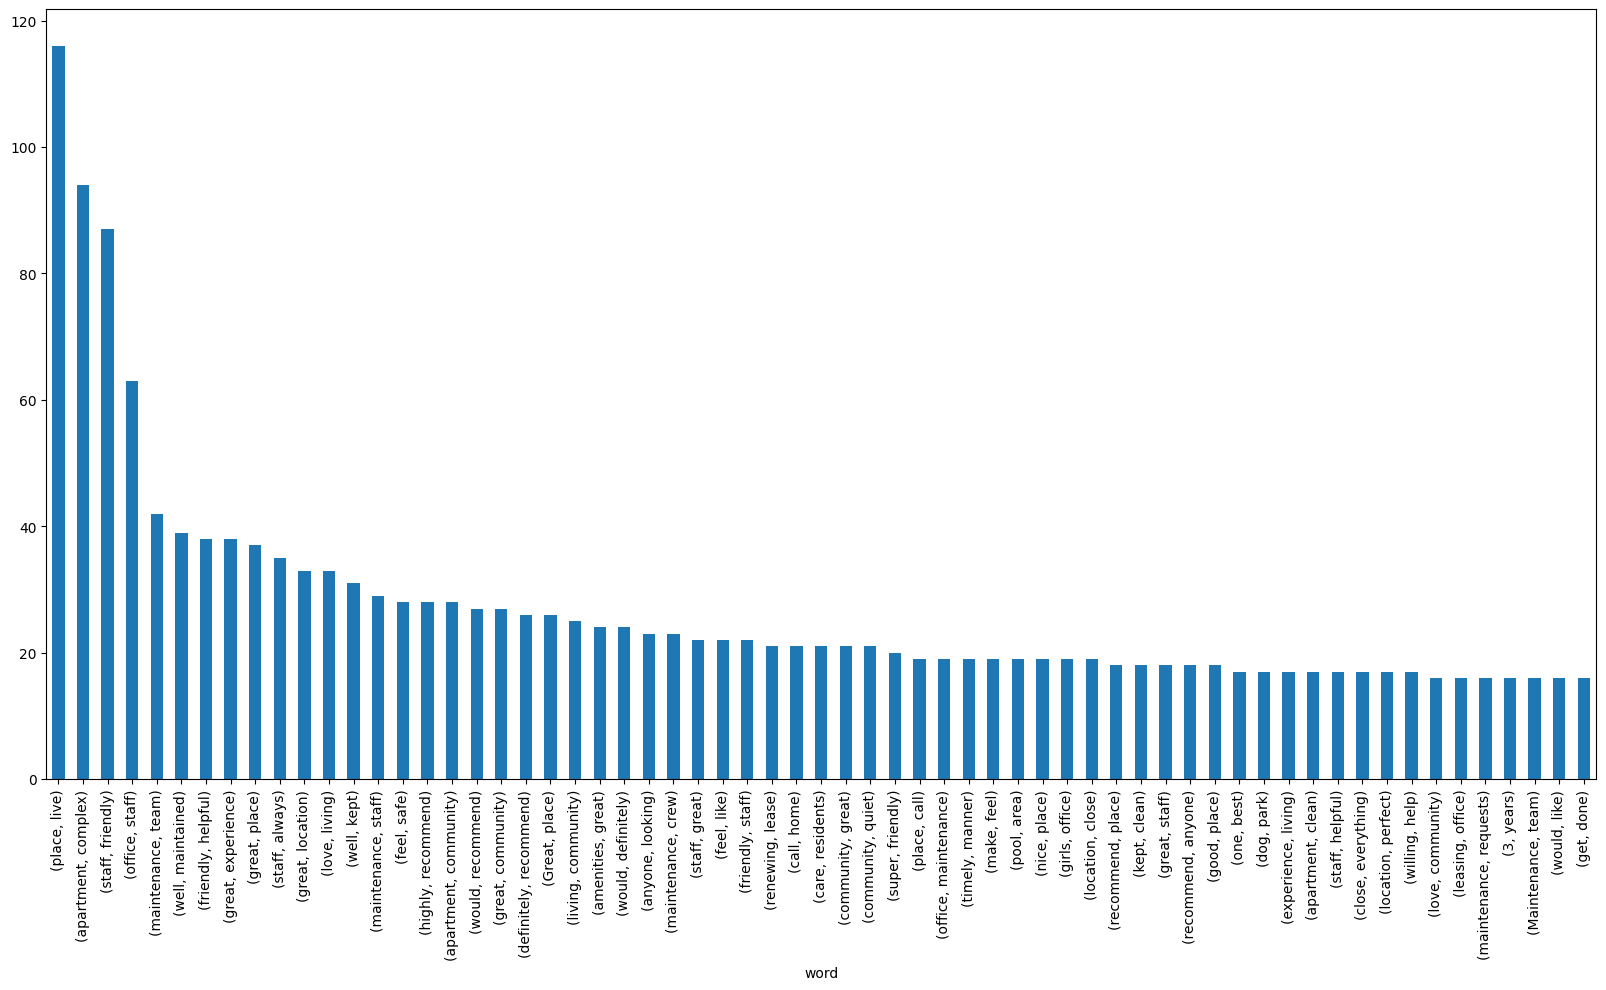

In [58]:
tempClean = textCleaner(tempData['Review Text'])
tempBigram = bigramCreator(tempClean)
tempDict = wordCounter(tempBigram)
tempDF = DFMaker(tempDict)

tempF = tempDF[tempDF['cnt'] > 15]
tempF.sort_values(by='cnt', ascending=False).plot(kind='bar', x='word', y='cnt', figsize=(20,10), legend=False)
plt.show()

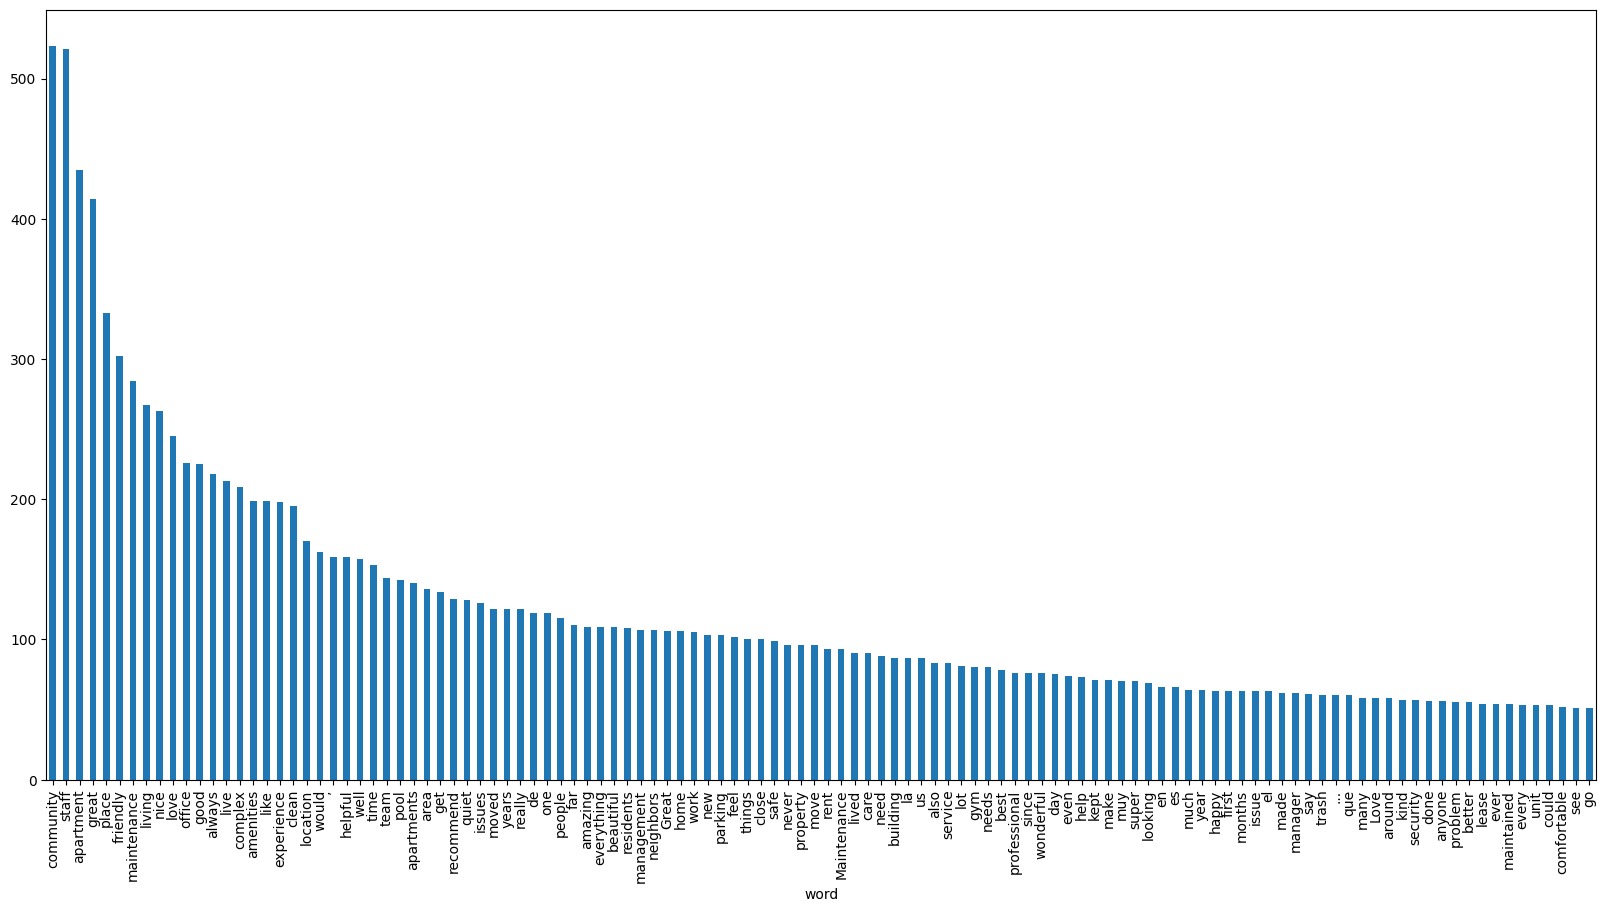

In [59]:
tempClean = textCleaner(tempData['Review Text'])
tempDict = wordCounter(tempClean)
tempDF = DFMaker(tempDict)

tempF = tempDF[tempDF['cnt'] > 50]
tempF.sort_values(by='cnt', ascending=False).plot(kind='bar', x='word', y='cnt', figsize=(20,10), legend=False)
plt.show()

In [ ]:
#textCleaner(dataList)
#	This will Tokenize, lemmatize, filter punctuation and retokenize after.
#	This will do all above.
#
#bigramCreator(dataList2)
#	Create Bigrams, Returns Bigram list
#
#wordCounter(dataList3)
#	Will count words and return list of counted words per word. Good for word frequency.
#
#reviewSorter(data, type)
#	Will sort prexisting data that has gone through sentiment analysis. Will look for whatever type you want -> Negative, Positive, Neutral.
#
#reviewSorterSCORE(data, type, score)
#	Will sort data and return a list of what data you want. Requires the data, what type of operator (<, <=, >, >=, ==) and what score you're comparing to.
#
#DFMaker(DF)
#	Will turn data into a dataframe.

In [65]:
# 4/4/25
# New test with new data. Revamped the sorting and made a new one based on review score not pre-existing 
# sentiment analysis as I now will analyze after sorting the data.

# This cell will run all of the preprocessing together here.

# This will get a list of sentiment scores that contain a score less than 4.5
filteredComments = reviewSorterSCORE(newData, "<", 4.5)

filteredClean = textCleaner(filteredComments)
filteredDict = wordCounter(tempClean)
filteredDF = DFMaker(filteredDict)


In [80]:
myset = set(newData['Apartment Complex'])
mysetfiltered = newData[newData['Apartment Complex'] == "NORA Apartments"]

In [83]:
print(mysetfiltered)

                              Primary Key  \
450  300a27fd-88ff-469a-bf88-e3c5e253967d   
451  c88d07d5-a8e6-4c37-aae0-6db66bc2162c   
452  5a1bbfc1-8172-4999-9270-8b8c8ef56445   
453  ac8a3dde-15e7-4ab6-bada-b56f14e17f91   
454  4b1e85b4-c2b6-4779-aeae-76b7730460d3   

                                           Review Text  Score       Date  \
450  This community is amazing! We love the locatio...    4.8  8/28/2024   
451  My husband and I have had nothing but pleasant...    5.0  8/12/2024   
452  The building is modern, clean with well cared-...    4.3  8/12/2024   
453  It is a very nice facility and building, and t...    3.8  7/24/2024   
454  I really love this community. The maintenance ...    5.0  5/31/2024   

    Apartment Complex Confirmed Tenant  
450   NORA Apartments              Yes  
451   NORA Apartments              Yes  
452   NORA Apartments              Yes  
453   NORA Apartments              Yes  
454   NORA Apartments              Yes  


In [84]:
filteredDict = {}

for apartment in newData['Apartment Complex'].unique():
    filteredDict[apartment] = newData[newData['Apartment Complex'] == apartment]

In [85]:
filteredDict

{'Carlton Arms of Winter Haven':                               Primary Key  \
 0    5ed15e3c-d14c-4e75-8706-08d9b2f05b6b   
 1    9b12c01d-b922-47fa-8974-2866327656dd   
 2    fff7edc7-2b09-403b-95fa-8091cf8eef1f   
 3    35ef0e55-0323-439e-ab22-72d02acfc921   
 4    9aba2001-ddc5-4970-bb75-248bc4724f8a   
 5    0123649f-e19d-41ec-8c0a-01381ee9544e   
 6    1d7a8eae-4f8d-4c62-a664-68c77482c089   
 7    2d6af75b-fc26-40ed-bf7e-2cdc5e60e9a9   
 8    f54ff595-4fcc-49ac-bc7c-5d4b0af4c26a   
 9    89b4fad4-a22d-44db-bc25-9899cb9000b8   
 10   4846b7ee-5dec-41a1-b235-9153a22f6886   
 11   2c825c3f-4a20-44de-8c13-152d0578798d   
 12   7ad00664-3fb7-4c83-b0ed-8508a6ab0928   
 13   26524469-b274-403b-9a4c-5e5263b99569   
 14   5bc211f2-202e-41e7-a580-afa02c076824   
 15   eca303b5-11c9-4eed-b96b-290b28fd5951   
 16   0e9d3891-f302-4df7-95ff-1f08de0b0923   
 17   b20d24ae-cb0d-4303-97aa-eb8572e3a57c   
 18   b9c85a56-5d9b-4940-8347-d6bdc3ace633   
 19   4338dcb8-24d1-47af-8fd7-de8e74976833   
 2

In [88]:
maxElement = max(filteredDict, key=lambda k: len(filteredDict[k]))
print(f"'{maxElement}' has the most elements: {len(filteredDict[maxElement])}")

'Bainbridge World Center' has the most elements: 57
